# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Задание:" data-toc-modified-id="Задание:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание:</a></div><div class="lev3 toc-item"><a href="#Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:" data-toc-modified-id="Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:-101"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Проверить работу реализованного алгоритма с различным числом кластеров:</a></div><div class="lev3 toc-item"><a href="#За-выполнение-ДЗ:" data-toc-modified-id="За-выполнение-ДЗ:-102"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>За выполнение ДЗ:</a></div>

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import math

# Задание:

Реализовать алгоритм кластеризации k-means

In [5]:
class KMeans:
    def __init__(self, n_clusters=2, metric='euclidean', max_iter=300):
        '''
        n_clusters - число кластеров
        metric - метрика
        max_iter - максимальное число итераций
        '''
        self.n_clusters = n_clusters
        self.metric = metric
        self.max_iter = max_iter

    #евклидово расстояние - корень из суммы квадратов разностей координат
    @staticmethod
    def eucl_distance(vector1, vector2):
        vector3 = (vector1 - vector2)**2
        return np.sqrt(vector3.sum())
    
    #расстояние Чебышева - максимальная из разностей координат
    @staticmethod
    def cheb_distance(vector1, vector2):
        max = 0
        vector3 = np.abs(vector2 - vector1)
        return vector3.max()
    
    #манхэттенское расстояние - сумма модулей разностей координат
    @staticmethod
    def manh_distance(vector1, vector2):
        vector3 = np.abs(vector2 - vector1)                
        return vector3.sum()
    
    def get_metric(self):
        if self.metric == 'manhattan':
            return KMeans.manh_distance
        elif self.metric == 'chebyshev':
            return KMeans.cheb_distance
        else:
            return KMeans.eucl_distance
        
    def predict(self, X):
        '''
        Предсказываем попадание объектов из X в конкретный кластер
        '''
        
        '''
        Шаг 2.1 - Вычисляем расстояние до цетров кластеров
    
        Шаг 2.2 - Для каждого объекта находим argmin от расстояний до центров
        '''
        answers = []
        for x in X:
            r = []
            for c in self.centers:
                #для каждой точки из множества ищем расстояния до центра ближайшего кластера
                #здесь можно поменять метрику
                r.append(self.get_metric()(c, x))   
            answers.append(np.argmin(r))
        return answers
        
                    

    def fit(self, X):  
        '''
        Шаг 1 - Инизиализируем начальные положения центров кластеров
        '''
        
        #Берем случайные элементы из X. Это может негативно повлиять на сходимость, но для начала сойдет.
        indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centers = X[indices, :]
        #for i in range(self.n_clusters):
        #    self.centers.append(X[i])
            
        
        '''
        Шаг 2 - Выполняем уточнение положения центров кластеров до тех пор, пока 
        не будет превышено значение max_iter или центры кластеров не будут меняться 
        '''
        for step in range(self.max_iter):            
           
            answers = self.predict(X) #массив длины len(Х), в каждом элементе которого содержится номер кластера, к которому он относится
            '''
            Шаг 2.3 - Уточняем положения центров кластеров
            '''
            for cluster_index in range(self.n_clusters):
                sum = 0
                num = 0
                for x, x_cluster_index in zip(X, answers):
                    if (cluster_index == x_cluster_index):
                        sum = sum + x
                        num += 1
                if num > 0:
                    self.centers[cluster_index] = sum / num

        '''
        Шаг 4 - Возвращяем предсказание
        '''        
        return self.predict(X)


















### Проверить работу реализованного алгоритма с различным числом кластеров:
* Для тестовых наборов данных (dataset1, dataset2, dataset3)
* Для задачи кластеризации цветов на изображении (пример в k-means_photo_clusterization)

### За выполнение ДЗ: 
* 6 баллов за реализацию алгоритма
* +2 балла за возможность выбора метрики
    - Евклидово расстояние
    - Расстояние Чебышева
    - Манхэттенское расстояние

In [8]:
X = np.genfromtxt('dataset1.csv', delimiter='\t')

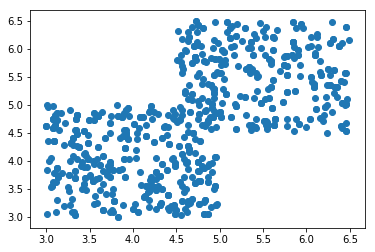

In [9]:
plt.scatter(X[:, 0], X[:, 1])

In [10]:
kMeans = KMeans()

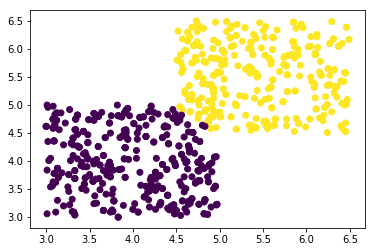

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=kMeans.fit(X))

In [28]:
X = np.genfromtxt('dataset2.csv', delimiter='\t')

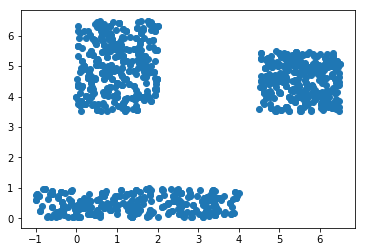

In [29]:
plt.scatter(X[:, 0], X[:, 1])

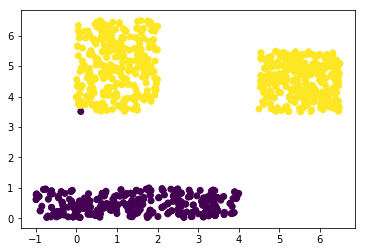

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=kMeans.fit(X))

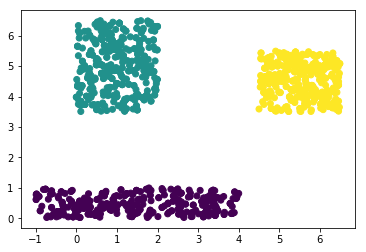

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=KMeans(n_clusters=3).fit(X))

In [32]:
X = np.genfromtxt('dataset3.csv', delimiter='\t')

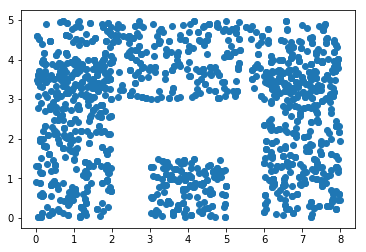

In [33]:
plt.scatter(X[:, 0], X[:, 1])

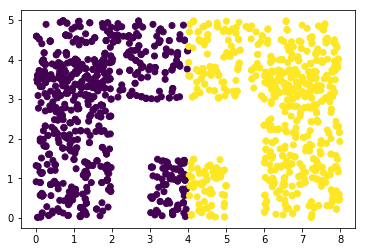

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=kMeans.fit(X))

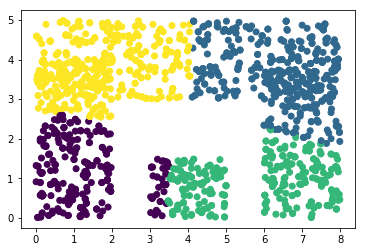

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=KMeans(n_clusters=4).fit(X))

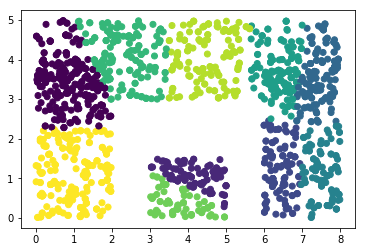

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=KMeans(n_clusters=10).fit(X))

Как мы видим, линейно эти данные не кластеризуются.

In [14]:
import matplotlib.image as mpimg

In [15]:
image = mpimg.imread('./m33.jpg')

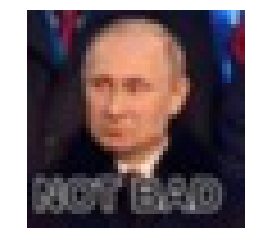

In [8]:
plt.axis("off")
plt.imshow(image)
plt.show()

In [53]:
data = image.reshape((image.shape[0]*image.shape[1],3))
data = data.astype(float)

In [92]:
kmeans = KMeans(n_clusters=64, metric = 'euclidean', max_iter = 10)
proc_data = kmeans.fit(data)

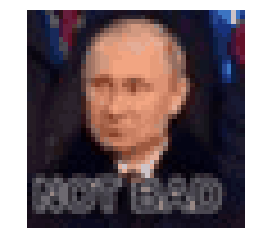

In [93]:
new_image = []
for cluster in proc_data:
    new_image.append(kmeans.centers[cluster])
    
new_image = np.array(new_image).astype(np.uint8)
new_image = new_image.reshape((image.shape[0],image.shape[1],3))

plt.axis("off")
plt.imshow(new_image)
plt.show()

In [26]:
data = image.reshape((image.shape[0]*image.shape[1],3))
data = data.astype(float)
kmeans = KMeans(n_clusters=8, metric = 'chebyshev', max_iter = 10)
proc_data = kmeans.fit(data)

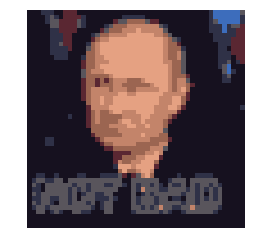

In [27]:
new_image = []
for cluster in proc_data:
    new_image.append(kmeans.centers[cluster])
    
new_image = np.array(new_image).astype(np.uint8)
new_image = new_image.reshape((image.shape[0],image.shape[1],3))

plt.axis("off")
plt.imshow(new_image)
plt.show()

In [24]:
data = image.reshape((image.shape[0]*image.shape[1],3))
data = data.astype(float)
kmeans = KMeans(n_clusters=8, metric = 'manhattan', max_iter = 10)
proc_data = kmeans.fit(data)

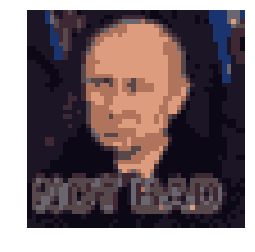

In [25]:
new_image = []
for cluster in proc_data:
    new_image.append(kmeans.centers[cluster])
    
new_image = np.array(new_image).astype(np.uint8)
new_image = new_image.reshape((image.shape[0],image.shape[1],3))

plt.axis("off")
plt.imshow(new_image)
plt.show()